# General setup

In [1]:
# General setup
import numpy as np
import os
import os.path as op
import matplotlib.pyplot as plt
from langouEEG import *
from scipy.stats import *
from eeg_microstates3 import *
import pandas as pd
import time
import mne
import pickle
from mne.datasets import sample
from mne.datasets import fetch_fsaverage
from mpl_toolkits.mplot3d import Axes3D  # noqa
from langouMicrostates import *
from IPython.display import clear_output as clear
import logging
# import easyEEG

sample_data_folder = mne.datasets.sample.data_path()
# dataRoot = "/data/home/viscent/Light"
dataRoot = "/work/zhangyq/Light/"


# Download fsaverage files
fs_dir = fetch_fsaverage(verbose=True)
isMale = False
isAll = True
isBlind = False
if not isAll:
    result_dir = op.join(dataRoot,'result','male' if isMale else 'female')
else:
    result_dir = op.join(dataRoot,'result','all')
subjects_dir = op.dirname(fs_dir)
if not op.exists(result_dir):
    os.mkdir(result_dir)
# The files live in:


0 files missing from root.txt in /work/zhangyq/mne_data/MNE-fsaverage-data
0 files missing from bem.txt in /work/zhangyq/mne_data/MNE-fsaverage-data/fsaverage


# Read the data

In [2]:
%%capture
## Input EEG data and extarct epochs

epochs_4F = dict()
epochs_RF = dict()
epochs_4R = dict()
epochs_RR = dict()
#epochs_all = dict()


# tmin_rest, tmax_rest, tmin_flick,tmax_flick = 40, 60, 15, 30
# tmin_rest, tmax_rest, tmin_flick,tmax_flick = 40, 50, 15, 22
tmin_rest, tmax_rest, tmin_flick,tmax_flick = 5, 25, 5, 25
# tmin_R_flick, tmax_R_flick = 20, 25
# tmin_R_flick, tmax_R_flick = 20, 22
tmin_R_flick, tmax_R_flick = 5, 25

# Total 1-21
# 1-11 and 12-21
epoch_num = 0
for subject_name in range(1,21):
    if not isAll:
        if not (isMale ^ (subject_name in [7,8,11,17])):
            continue
    if subject_name<10:
        subject_name='S0'+str(subject_name)
    else:
        subject_name='S'+str(subject_name)
    with open(dataRoot+'/clean_data_av/'+subject_name+'_clean.lgeeg','rb') as f:
        raw=pickle.load(f)
    events, event_dict=extractEvents(raw)
    picks = mne.pick_types(raw.info, meg=False, eeg=True, stim=False, eog=False,
                        exclude='bads')

    epoch_RR,epoch_RF,epoch_4R,epoch_4F = extractEpochs_forall(raw,events,picks, 
    tmin_rest = tmin_rest,tmax_rest = tmax_rest,tmin_flick = tmin_flick,tmax_flick = tmax_flick)
    # 为啥搞两遍？
    ## A: 因为之前random与40Hz取的时间段不同，我写的垃圾代码只能传进一个tmin_flick
    _,epoch_RF,_,_ = extractEpochs_forall(raw,events,picks, 
    tmin_rest = tmin_rest,tmax_rest = tmax_rest,tmin_flick = tmin_R_flick,tmax_flick = tmax_R_flick)
    epochs_4F[subject_name]=epoch_4F
    epochs_RF[subject_name]=epoch_RF
    epochs_RR[subject_name]=epoch_RR
    epochs_4R[subject_name]=epoch_4R
    #epochs_all[epoch_num] = epoch_4R
    #epochs_all[epoch_num+1] = epoch_4F
    #epochs_all[epoch_num+2] = epoch_RF
 
    data_path = sample.data_path()

    picks = mne.pick_types(raw.info, meg=False, eeg=True, stim=False, eog=False,
                        exclude='bads')

    epoch_num += 3
    # Clear output display
    clear()

## Concact epochs
epoch_4F = mne.concatenate_epochs(list(epochs_4F.values()))
epoch_RF = mne.concatenate_epochs(list(epochs_RF.values()))
epoch_4R = mne.concatenate_epochs(list(epochs_4R.values()))
# epoch_all = mne.concatenate_epochs(list(epochs_all.values()))
# mne.epochs.equalize_epoch_counts([epoch_4F, epoch_RF, epoch_RR])

# Clear output display
clear()

# Concatenate all epochs in all conditions

In [3]:
epoch_all = mne.concatenate_epochs([epoch_4F, epoch_RF, epoch_4R])
epoch_dur = np.zeros((3))
epoch_dur = [epoch_4F.get_data().shape[0]*epoch_4F.get_data().shape[2],epoch_RF.get_data().shape[0]*epoch_RF.get_data().shape[2],epoch_4R.get_data().shape[0]*epoch_4R.get_data().shape[2]]
epoch_count = [epoch_4F.get_data().shape[0],epoch_RF.get_data().shape[0],epoch_4R.get_data().shape[0]]
epoch_size = epoch_all.get_data().shape[2]

Not setting metadata
Not setting metadata
302 matching events found
No baseline correction applied
Created an SSP operator (subspace dimension = 1)
0 bad epochs dropped


# Do MS analysis

(3020302, 64)


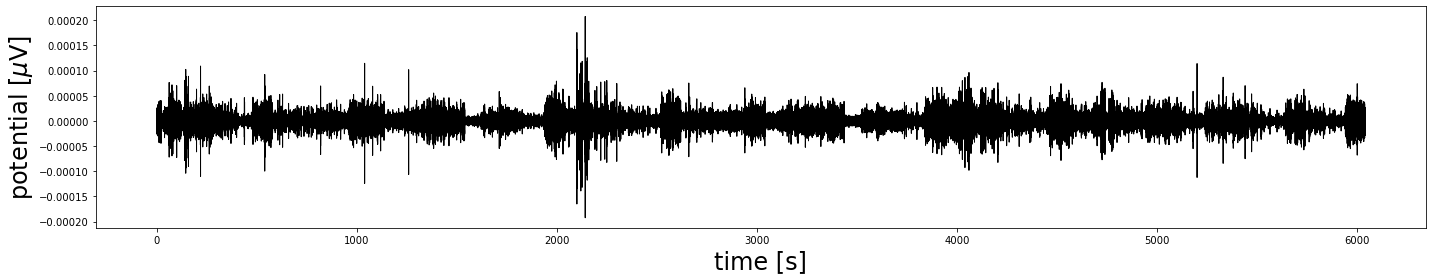

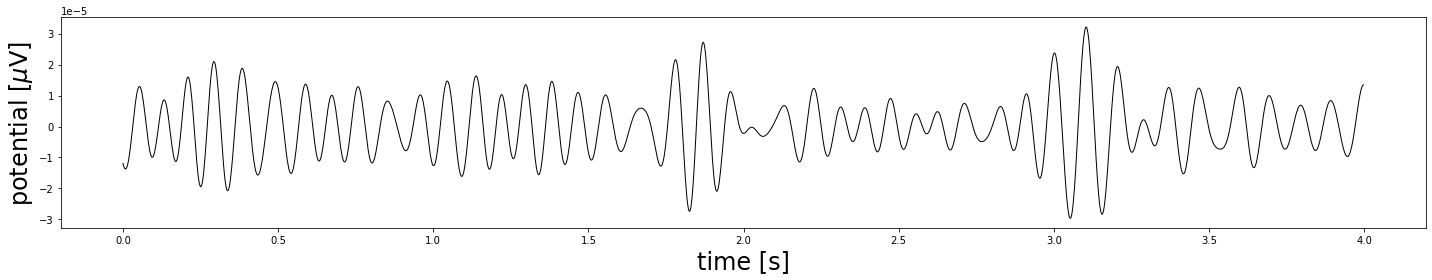

Clustering algorithm: kmeans
[+] Data format for clustering [GFP peaks, channels]: 126860 x 64

[+] Clustering algorithm: mod. K-MEANS.
	K-means run 1/5 converged after 63 iterations.
	K-means run 2/5 converged after 69 iterations.
	K-means run 3/5 converged after 54 iterations.
	K-means run 4/5 converged after 46 iterations.
	K-means run 5/5 converged after 38 iterations.
[+] Computation time: 54.48 sec

[+] Microstate back-fitting:
data_norm:  (3020302, 64)
data_cluster_norm:  (126860, 64)
maps:  (8, 64)

[+] Global explained variance GEV = 0.632
GEV_0: 0.095
GEV_1: 0.072
GEV_2: 0.095
GEV_3: 0.064
GEV_4: 0.076
GEV_5: 0.093
GEV_6: 0.031
GEV_7: 0.108

Empirical symbol distribution (RTT):

p_0 = 0.117
p_1 = 0.227
p_2 = 0.177
p_3 = 0.004
p_4 = 0.237
p_5 = 0.009
p_6 = 0.003
p_7 = 0.225

Empirical transition matrix:

|0.8740.0320.0280.0010.0310.0040.0020.029|
|0.0150.8630.0300.0010.0570.0020.0010.032|
|0.0220.0340.8690.0010.0360.0020.0010.036|
|0.0370.0340.0320.7890.0320.0210.0090.047|
|0.

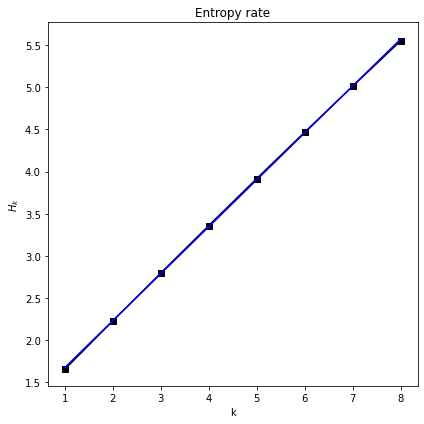


Empirical entropy rate h = 0.56
Theoretical MC entropy rate h = 0.57


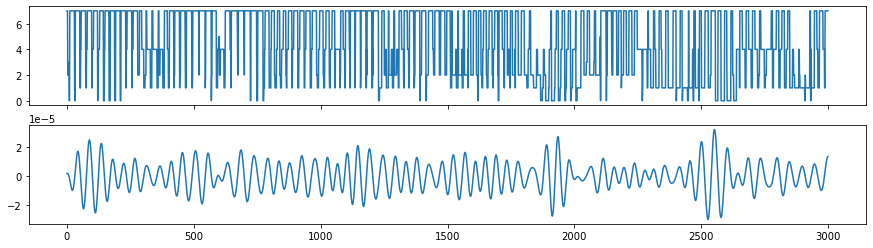

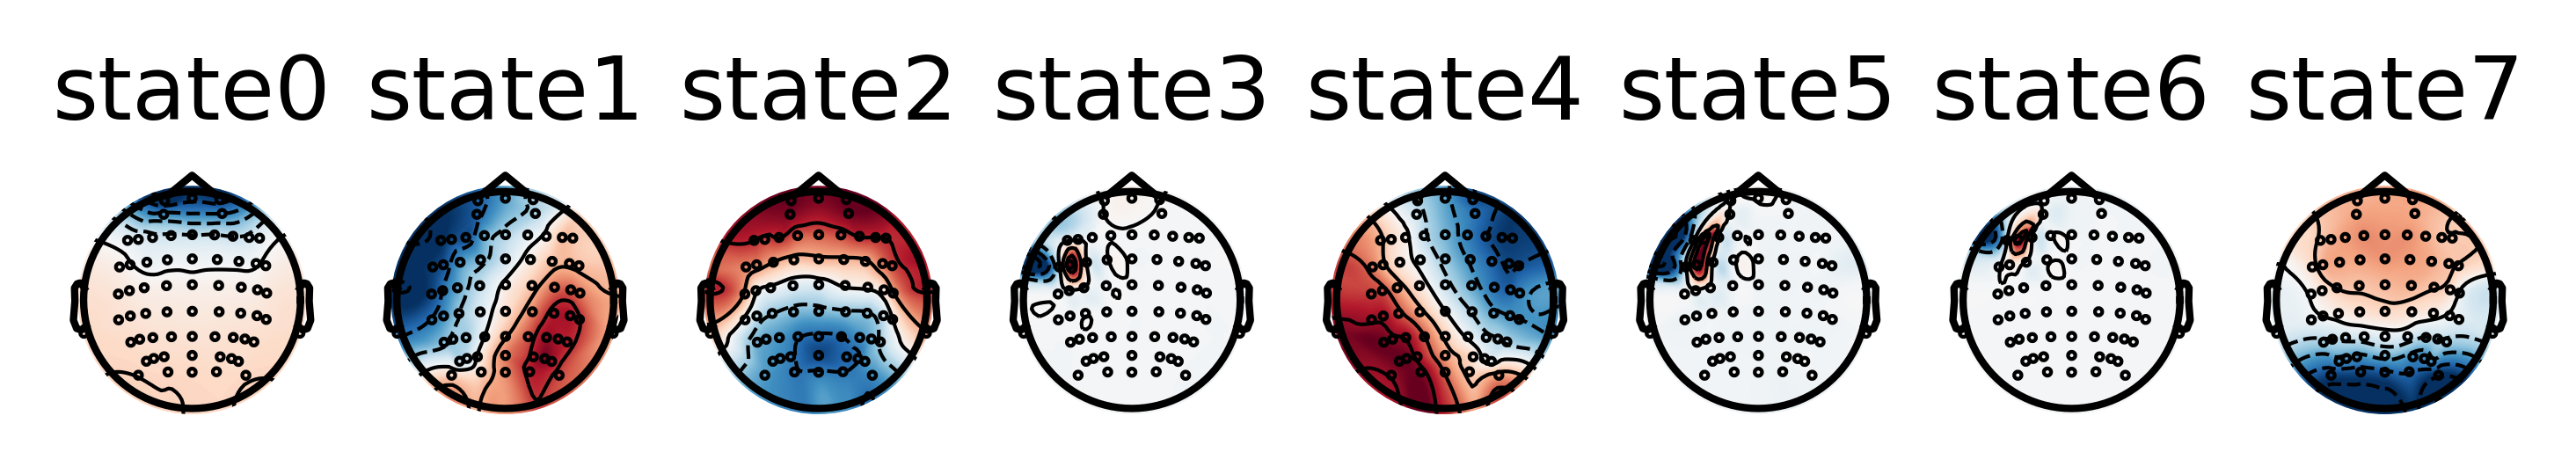

In [4]:
# epochs_order = list(epochs_4R.values())
# for i in list(epochs_4F.values()):
#     epochs_order.append(i)
# for i in list(epochs_RF.values()):
#     epochs_order.append(i)
# epoch_order = mne.concatenate_epochs(epochs_order)
epoch_order = epoch_all

dataRoot = "/work/zhangyq/Light/"

result_dir = dataRoot + "result/microstates"
tm = time.strftime("%Y_%m_%d_%H_%M_%S", time.localtime())
time_augs=[['min_rest','max_rest','min_flick','max_flick','min_random_flick','max_random_flick']
,[tmin_rest, tmax_rest, tmin_flick, tmax_flick, tmin_R_flick, tmax_R_flick]]

# Args to save MS result
save = False
to_save_cache = False
save_log = False

from langouEEG import *
# mode: "aahc", "kmeans", "kmedoids", "pca", "ica"
vars_all = display_maps(epoch_order, n_maps=8, save=save, dpi=600, filename='all',
fmt='.png', to_save_cache=to_save_cache, time_augs=time_augs, tm=tm, result_dir=result_dir,
calc_lzc=False, epochs=epoch_order,save_log=save_log, f_lo=8, f_hi=13, mode=1)

# Wash the data, seperate the data according to different conditions

In [5]:
# return maps, x, gfp_peaks, gev, data, pca1
x = vars_all[1]
gfp = vars_all[2]
gfp_l = np.zeros(x.shape[0])
gfp_l[gfp] = 1
u = v = 0
i_prev = x[0]
for i in x:
    if i != i_prev:
        if v-u < 15:
            for j in range(u, v):
                x[j] = 8
        v+=1
        u=v
    else:
        v+=1
x_4F = vars_all[1][0:epoch_dur[0]]
x_RF = vars_all[1][epoch_dur[0]:epoch_dur[0]+epoch_dur[1]]
x_4R = vars_all[1][epoch_dur[0]+epoch_dur[1]:epoch_dur[0]+epoch_dur[1]+epoch_dur[2]]

In [6]:
reject_rate = np.sum(np.where(x==8,1,0))/x.shape[0]
print(str(reject_rate)+' data rejected for too short duration ( < 30ms)')

x_clean_4F = np.zeros(x_4F.shape[0]-(np.sum(np.where(x_4F==8,1,0))),dtype=np.int16)
gfp_4F = np.zeros(x_4F.shape[0]-(np.sum(np.where(x_4F==8,1,0))),dtype=np.int16)
i = 0
for j in range(x_4F.shape[0]):
    if x_4F[j] != 8:
        x_clean_4F[i] = x_4F[j]
        gfp_4F[i] = gfp_l[j]
        i+=1
        
x_clean_RF = np.zeros(x_RF.shape[0]-(np.sum(np.where(x_RF==8,1,0))),dtype=np.int16)
gfp_RF = np.zeros(x_RF.shape[0]-(np.sum(np.where(x_RF==8,1,0))),dtype=np.int16)
i = 0
for j in range(x_RF.shape[0]):
    if x_RF[j] != 8:
        x_clean_RF[i] = x_RF[j]
        gfp_RF[i] = gfp_l[j]
        i+=1
        
x_clean_4R = np.zeros(x_4R.shape[0]-(np.sum(np.where(x_4R==8,1,0))),dtype=np.int16)
gfp_4R = np.zeros(x_4R.shape[0]-(np.sum(np.where(x_4R==8,1,0))),dtype=np.int16)
i = 0
for j in range(x_4R.shape[0]):
    if x_4R[j] != 8:
        x_clean_4R[i] = x_4R[j]
        gfp_4R[i] = gfp_l[j]
        i+=1
    

0.13648337153039664 data rejected for too short duration ( < 30ms)


# Quantitative analysis
## Coverage

In [7]:
epoch_minimum = np.min(epoch_count)
coverage = np.zeros((3,epoch_minimum,8))
for i in range(epoch_minimum):
    coverage[0,i] = np.bincount(x_clean_4F[i*epoch_size:(i+1)*epoch_size],minlength=8)/epoch_size
    coverage[1,i] = np.bincount(x_clean_RF[i*epoch_size:(i+1)*epoch_size],minlength=8)/epoch_size
    coverage[2,i] = np.bincount(x_clean_4R[i*epoch_size:(i+1)*epoch_size],minlength=8)/epoch_size

In [8]:
import pandas as pd
def save_var(save_folder, filename, data):
    # data is a *nd array*
    if not os.path.exists(save_folder):
        os.makedirs(save_folder)
    writer = pd.ExcelWriter(save_folder + '/{0}'.format(filename))
    for i in range(data.shape[0]):
        data_write = pd.DataFrame(data[i])
        data_write.to_excel(writer, '{0}'.format(i), float_format='%.5f')
    writer.save()
    return

dataRoot = "/work/zhangyq/Light/"
result_dir = dataRoot + "result/microstates"
save_folder = result_dir + '/cache/' + tm

save_coverage_m=False
if save_coverage_m:
    save_var(save_folder=save_folder, filename="coverage_m.xlsx", data=coverage)

In [9]:
'''pval matrix
4F-4R 0-7
RF-4R 8-15
4F-RF 16-23
'''
from statsmodels.stats.multitest import *
from scipy.stats import ttest_ind
pval = np.zeros(24)
for j in range(8):
    pval[j] = ttest_ind(coverage[0,:,j],coverage[2,:,j])[1]
    pval[8+j] = ttest_ind(coverage[1,:,j],coverage[2,:,j])[1]
    pval[16+j] = ttest_ind(coverage[0,:,j],coverage[1,:,j])[1]
fdr_val = fdrcorrection(pval,alpha=0.05,method='indep',is_sorted=False)
fdr_4F_4R = [fdr_val[0][0:8],fdr_val[1][0:8]]
fdr_RF_4R = [fdr_val[0][8:16],fdr_val[1][8:16]]
fdr_4F_RF = [fdr_val[0][16:24],fdr_val[1][16:24]]

fdr_val


(array([False, False, False, False, False, False, False, False,  True,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False]),
 array([0.19553851, 0.86733994, 0.8461269 , 0.82804137, 0.86733994,
        0.82804137, 0.93539979, 0.85983112, 0.01209083, 0.11907507,
        0.82804137, 0.44583305, 0.36221863, 0.37566004, 0.8461269 ,
        0.82804137, 0.37566004, 0.17612126, 0.79493311, 0.37566004,
        0.39534206, 0.44583305, 0.82804137, 0.79493311]))

## Frequency of occurance

In [10]:
freq_occur_4F = []
for i in range(epoch_minimum):
    idx = np.where(gfp_4F[i*epoch_size:(i+1)*epoch_size]==1)
    freq_occur = np.bincount(x_clean_4F[idx],minlength=8)/np.sum(gfp_4F[i*epoch_size:(i+1)*epoch_size])
    if np.sum(gfp_4F[i*epoch_size:(i+1)*epoch_size]) != 0:
        freq_occur_4F.append(freq_occur)
freq_occur_4F = np.array(freq_occur_4F)
freq_occur_RF = []
for i in range(epoch_minimum):
    idx = np.where(gfp_RF[i*epoch_size:(i+1)*epoch_size]==1)
    freq_occur = np.bincount(x_clean_RF[idx],minlength=8)/np.sum(gfp_RF[i*epoch_size:(i+1)*epoch_size])
    if np.sum(gfp_RF[i*epoch_size:(i+1)*epoch_size]) != 0:
        freq_occur_RF.append(freq_occur)
freq_occur_RF = np.array(freq_occur_RF)
freq_occur_4R = []
for i in range(epoch_minimum):
    idx = np.where(gfp_4R[i*epoch_size:(i+1)*epoch_size]==1)
    freq_occur = np.bincount(x_clean_4R[idx],minlength=8)/np.sum(gfp_4R[i*epoch_size:(i+1)*epoch_size])
    if np.sum(gfp_4R[i*epoch_size:(i+1)*epoch_size]) != 0:
        freq_occur_4R.append(freq_occur)
freq_occur_4R = np.array(freq_occur_4R)

<ipython-input-10-87ead1ec2557>:4: RuntimeWarning: invalid value encountered in true_divide
  freq_occur = np.bincount(x_clean_4F[idx],minlength=8)/np.sum(gfp_4F[i*epoch_size:(i+1)*epoch_size])
<ipython-input-10-87ead1ec2557>:11: RuntimeWarning: invalid value encountered in true_divide
  freq_occur = np.bincount(x_clean_RF[idx],minlength=8)/np.sum(gfp_RF[i*epoch_size:(i+1)*epoch_size])
<ipython-input-10-87ead1ec2557>:18: RuntimeWarning: invalid value encountered in true_divide
  freq_occur = np.bincount(x_clean_4R[idx],minlength=8)/np.sum(gfp_4R[i*epoch_size:(i+1)*epoch_size])


In [11]:
print(freq_occur_4F[1,:])

print(freq_occur_RF[1,:])

print(freq_occur_4R[1,:])



[0.1010101  0.29040404 0.10858586 0.         0.21717172 0.
 0.         0.28282828]
[0.09443099 0.24939467 0.12106538 0.00242131 0.28571429 0.
 0.         0.24697337]
[0.23261391 0.20863309 0.13429257 0.00239808 0.23501199 0.00719424
 0.00959233 0.17026379]


## Duration

In [12]:
dur_4F = [[],[],[],[],[],[],[],[]]
for i in range(epoch_minimum):
    u = v = 0
    prev_state = x_clean_4F[0]
    for j in x_clean_4F[i*epoch_size:(i+1)*epoch_size]:
        if j != prev_state:
            dur_4F[prev_state].append(u-v)
            u = v
            prev_state = j
        v += 1
dur_RF = [[],[],[],[],[],[],[],[]]
for i in range(epoch_minimum):
    u = v = 0
    prev_state = x_clean_RF[0]
    for j in x_clean_RF[i*epoch_size:(i+1)*epoch_size]:
        if j != prev_state:
            dur_RF[prev_state].append(u-v)
            u = v
            prev_state = j
        v += 1
dur_4R = [[],[],[],[],[],[],[],[]]
for i in range(epoch_minimum):
    u = v = 0
    prev_state = x_clean_4R[0]
    for j in x_clean_4R[i*epoch_size:(i+1)*epoch_size]:
        if j != prev_state:
            dur_4R[prev_state].append(u-v)
            u = v
            prev_state = j
        v += 1


In [13]:
# 0: rest, 1: 40Hz, 2: random
# duration_list = np.asarray([dur_4R, dur_4F, dur_RF])
# len(dur_4R[6])
# save_var(save_folder=save_folder, filename="duration_m.xlsx", data=duration_list)



# MS class selection
## According to the highest *n* occurance 

In [14]:
def pick_MS(x, accept_list=[]):
    state_prev = -1
    # 避免前几个不再accept_list之内
    for i in x:
        if i in accept_list:
            state_prev = i
            break
    # 从头遍历，将x中不在accept_list当中的state替换为前面的一个state
    for index, i in enumerate(x):
        if i not in accept_list:
            x[index] = state_prev
        else:
            state_prev = x[index]
    return x


# Quantitative analysis continue
## Transition matrix

In [15]:

# vars return: maps, x, gfp_peaks, gev, data, pca1
def analyze_RTT(x, n_maps):
    p_hat = p_empirical(x, n_maps)
    T_hat = T_empirical(x, n_maps)
    print("\nEmpirical symbol distribution (RTT):\n")
    for i in range(n_maps):
        print(f"p_{i:d} = {p_hat[i]:.3f}")
    print("\nEmpirical transition matrix:\n")
    print_matrix(T_hat)
    return

accept_list=[0, 2, 4, 6]
x_pick_4R = pick_MS(x=x_clean_4R, accept_list=accept_list)
x_pick_4F = pick_MS(x=x_clean_4F, accept_list=accept_list)
x_pick_RF = pick_MS(x=x_clean_RF, accept_list=accept_list)



In [16]:
analyze_RTT(x_pick_4R, n_maps=8)
analyze_RTT(x_pick_4F, n_maps=8)
analyze_RTT(x_pick_RF, n_maps=8)



Empirical symbol distribution (RTT):

p_0 = 0.225
p_1 = 0.000
p_2 = 0.298
p_3 = 0.000
p_4 = 0.467
p_5 = 0.000
p_6 = 0.009
p_7 = 0.000

Empirical transition matrix:

|0.9290.0000.0280.0000.0420.0000.0010.000|
|0.0000.0000.0000.0000.0000.0000.0000.000|
|0.0230.0000.9220.0000.0540.0000.0010.000|
|0.0000.0000.0000.0000.0000.0000.0000.000|
|0.0190.0000.0360.0000.9440.0000.0010.000|
|0.0000.0000.0000.0000.0000.0000.0000.000|
|0.0350.0000.0340.0000.0420.0000.8890.000|
|0.0000.0000.0000.0000.0000.0000.0000.000|

Empirical symbol distribution (RTT):

p_0 = 0.196
p_1 = 0.000
p_2 = 0.318
p_3 = 0.000
p_4 = 0.476
p_5 = 0.000
p_6 = 0.009
p_7 = 0.000

Empirical transition matrix:

|0.9250.0000.0310.0000.0420.0000.0020.000|
|0.0000.0000.0000.0000.0000.0000.0000.000|
|0.0210.0000.9230.0000.0550.0000.0010.000|
|0.0000.0000.0000.0000.0000.0000.0000.000|
|0.0170.0000.0370.0000.9450.0000.0010.000|
|0.0000.0000.0000.0000.0000.0000.0000.000|
|0.0320.0000.0420.0000.0470.0000.8800.000|
|0.0000.0000.0000.0000.

# Calculate SDI and modify x

In [17]:
def normalise(data):    
    
    # This metric doesn't care how the data are arranged, so we reshape to a
    # vector
    # print('Reshaping data...')
    
    data_norm = data.reshape(1, np.size(data), order='F').copy()
    # print('...done')
    
    # Subtract the mean from each element
    # print('Normalising...')
    data_norm = data_norm - np.mean(data_norm)
    
    # Divide by the root mean square deviation from the mean across elements
    if (np.mean(data_norm**2) != 0):
        data_norm	= data_norm / np.math.sqrt(np.mean(data_norm**2))
    # print('...done')
    
    return data_norm


# This function calculates an index of dissimilarity between data1 and data2.
def SourceDissimilarityIndex(data1, data2):
    
    # Convert data to numpy array
    data1 = np.array(data1)
    data2 = np.array(data2)
    
    # Check input variables to ensure dimensions match
    if not (np.shape(data1) == np.shape(data2)):
        raise ValueError('data1 and data2 must have the same dimensions')
    
    # Calculate the deviation of each element in each dataset from the mean,
    # relative to the average deviation across the dataset
    # print('DATA 1:')
    data1_norm	= normalise(data1)
    # print('DATA 2:')
    data2_norm	= normalise(data2)
    
    # Take the root mean square (rms) difference between the two conditions
    # print('Calculating dissimilarity index...')    
    SDI = np.math.sqrt(np.mean((data1_norm - data2_norm)**2))
    # print('...done')
    
    # Print the value
    # print('----------------------------------')
    # print('Source Dissimilarity Index = ' + str("{0:.3f}".format(SDI)))
        
    return SDI


maps = vars_all[0]
ABCD_ = input("Please input the ABCD sequence, e.g.: 0,1,2,3").split(',')
ABCD = [int(ABCD_[i]) for i in range(len(ABCD_))]
print('Class A: state {0}\nClass B: state {1}\nClass C: state {2}\nClass D: state {3}'.format(ABCD[0], ABCD[1], ABCD[2], ABCD[3]))

Class A: state 4
Class B: state 1
Class C: state 2
Class D: state 7


In [25]:
def indentify_by_SDI(map_to_identify, maps, ABCD):
    # 判断当前map与另一个map的SDI
    SDI = []
    for i in ABCD:
        SDI.append(SourceDissimilarityIndex(map_to_identify, maps[i]))
    return ABCD[SDI.index(min(SDI))]

def clustering_by_SDI(ABCD, maps):
    # 根据SDI大小判断当前map属于哪一个特定的class
    # SDI越小说明越similar
    # 输出为一个dict (cluster_result)
    n_maps = maps.shape[0]
    cluster_result = {}
    not_ABCD = [x for x in list(range(n_maps)) if x not in ABCD]
    for i in not_ABCD:
        result = indentify_by_SDI(maps[i], maps, ABCD)
        cluster_result[i] = result
        print('State {0} -> State {1}'.format(i, result))
    return cluster_result

def format_cluster_result(cluster_result):
    # 因为x的map编号是从1开始的，而正常索引都是从0开始的
    # 因此对cluster_result每个key的值+1
    for i in cluster_result.keys():
        cluster_result[i] += 1
    return cluster_result

def substitute_by_SDI(x, cluster_result):
    # 对x当中的不属于ABCD的项根据cluster_result进行替换
    for i in cluster_result.keys():
        x[x==i] = cluster_result[i]
    print("Substitution done")
    return x

def replace_x_by_SDI(x, ABCD, maps):
    cluster_result = clustering_by_SDI(ABCD, maps)
    cluster_result_plus = format_cluster_result(cluster_result)
    x = substitute_by_SDI(x, cluster_result_plus)
    return x

x = vars_all[1]
cluster_result = clustering_by_SDI(ABCD, maps)
x_repl = substitute_by_SDI(x, format_cluster_result(cluster_result))

State 0 -> State 4
State 3 -> State 2
State 5 -> State 2
State 6 -> State 2
Substitution done


In [26]:

gfp = vars_all[2]
gfp_l = np.zeros(x.shape[0])
gfp_l[gfp] = 1
def find_gfp_state():

    return 

In [86]:
gev = vars_all[3]
def add_gevs(gev, ABCD, cluster_result):
    gev_new = {}
    not_ABCD = [x for x in list(range(gev.shape[0])) if x not in ABCD]
    for i in ABCD:
        gev_new[i] = gev[i]
    for i in not_ABCD:
        real_state = cluster_result[i]
        gev_to_add = gev[i]
        gev_new[real_state] += gev_to_add
    return gev_new

gev = add_gevs(gev, ABCD, cluster_result)
print(gev)

{4: 0.17078459655056596, 1: 0.07193224088557594, 2: 0.2818487227015947, 7: 0.10756933698871203}


In [84]:
# freq_occur_4F, freq_occur_4R, freq_occur_RF
## print(freq_occur_4F.shape)

def add_occurance(freq_occur, ABCD, cluster_result):
    not_ABCD = [x for x in list(range(freq_occur.shape[0])) if x not in ABCD]
    # freq_occur = np.mean(freq_occur, axis=0)
    freq_occur_new = {}
    for i in ABCD:
        freq_occur_new[i] = freq_occur[i]
    for i in not_ABCD:
        real_state = cluster_result[i]
        occur_to_add = freq_occur[i]
        freq_occur_new[real_state] += occur_to_add
    return list(freq_occur_new.values())

def add_occurance_all(freq_occur, ABCD, cluster_result):
    freq_occur_new = np.zeros(shape=(freq_occur.shape[0], len(ABCD)))
    for index, i in enumerate(freq_occur):
        add_result = add_occurance(i, ABCD, cluster_result)
        freq_occur_new[index] = add_result
    return freq_occur_new


freq_occur_4R_m = add_occurance_all(freq_occur_4R, ABCD, cluster_result)
freq_occur_4F_m = add_occurance_all(freq_occur_4F, ABCD, cluster_result)
freq_occur_RF_m = add_occurance_all(freq_occur_RF, ABCD, cluster_result)

print(freq_occur_4R_m[0])
print(freq_occur_4F_m[0])
print(freq_occur_RF_m[0])

[0.48306998 0.22121896 0.14672686 0.1489842 ]
[0.23728814 0.27360775 0.10411622 0.38498789]
[0.42093023 0.24651163 0.10697674 0.2255814 ]
